# Practica de programacion III 📊📉📈

# Presentación

---

### **Nombre:**
**Wilver Manuel Yena Garcia (2024 - 0903)**

### **Materia:**
**Programación III**

In [40]:
# importacion de las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
# Mostrar todas las variables o columnas de nuestros Dataset
pd.set_option('display.max_columns', None)

In [4]:
# importancio de los datos de la cual se haran los analisis
df_original = pd.read_excel(r'C:\Users\wilbe\Downloads\data_corregida.xlsx')
print('DATOS DE EMERGENCIA EN REPUBLICA DOMINICANA 2021 - 2025')
print()
print(df_original.head(5))

DATOS DE EMERGENCIA EN REPUBLICA DOMINICANA 2021 - 2025

                 FECHA NACIONALIDAD EDAD     GƒNERO  DIAGNOSTICO_CAUSA  \
0  2021-07-01 00:00:00   DOMINICANA   21  MASCULINO  Traumas Generales   
1  2021-07-01 00:00:00   DOMINICANA   51   FEMENINO              Otros   
2  2021-07-01 00:00:00   DOMINICANA   57  MASCULINO              Otros   
3  2021-07-01 00:00:00   DOMINICANA   35  MASCULINO              Otros   
4  2021-07-01 00:00:00   DOMINICANA   70   FEMENINO              Otros   

  Otras_\nespecificar                    EVOLUCION ESPECIALIDAD  
0   TRAUMA EN OJO IZQ  Estabilizados y Despachados          911  
1  DOLOR GENERALIZADO  Estabilizados y Despachados          911  
2        DOLOR LUMBAL  Estabilizados y Despachados          911  
3             CEFALEA  Estabilizados y Despachados          911  
4   DISNEA /DISORTRIA  Estabilizados y Despachados          911  


In [50]:
df_original.head()

,FECHA,NACIONALIDAD,EDAD,GƒNERO,DIAGNOSTICO_CAUSA,Otras_\nespecificar,EVOLUCION,ESPECIALIDAD
0,2021-07-01 00:00:00,DOMINICANA,21,MASCULINO,Traumas Generales,TRAUMA EN OJO IZQ,Estabilizados y Despachados,911
1,2021-07-01 00:00:00,DOMINICANA,51,FEMENINO,Otros,DOLOR GENERALIZADO,Estabilizados y Despachados,911
2,2021-07-01 00:00:00,DOMINICANA,57,MASCULINO,Otros,DOLOR LUMBAL,Estabilizados y Despachados,911
3,2021-07-01 00:00:00,DOMINICANA,35,MASCULINO,Otros,CEFALEA,Estabilizados y Despachados,911
4,2021-07-01 00:00:00,DOMINICANA,70,FEMENINO,Otros,DISNEA /DISORTRIA,Estabilizados y Despachados,911


# Preparacion de los datos

In [5]:
# Creamos una copia de nuestro dataframe para antes y un despues
df_copia = df_original.copy()
# Antes de cualquier analisis es conocer tus variables o columnas 
print(df_copia.columns)

Index(['FECHA', 'NACIONALIDAD', 'EDAD', 'GƒNERO', 'DIAGNOSTICO_CAUSA',
       'Otras_\nespecificar', 'EVOLUCION', 'ESPECIALIDAD'],
      dtype='object')


In [6]:
# En mi caso modifcare 2 columnas que serian Genero y Otras_\nespecificar, de la manera correcta
df_copia = df_copia.rename(columns={'GƒNERO': 'GENERO'})
df_copia = df_copia.rename(columns={'Otras_\nespecificar': 'OTRAS'})

In [7]:
# Identificamos si tenemos valores vacios de nuestro dataset
print('IDENTIFICANDO VALORES NULOS DE NUESTRO DATASET')
print()
print(df_copia.isnull().value_counts())
df_copia[df_copia.isnull().any(axis=1)]

IDENTIFICANDO VALORES NULOS DE NUESTRO DATASET

FECHA  NACIONALIDAD  EDAD   GENERO  DIAGNOSTICO_CAUSA  OTRAS  EVOLUCION  ESPECIALIDAD
False  False         False  False   False              False  False      False           248907
                                                                         True              1126
                                    True               False  False      False               94
                                    False              False  True       False               49
                                                       True   True       True                 6
                                                       False  True       True                 4
                     True   False   False              False  False      False                2
                     False  False   False              True   False      False                1
       True          False  False   False              False  False      False                1
Na

,FECHA,NACIONALIDAD,EDAD,GENERO,DIAGNOSTICO_CAUSA,OTRAS,EVOLUCION,ESPECIALIDAD
57001,2022-06-18 00:00:00,DOMINICANA,20,MASCULINO,NaN,TRAUMA MANO IZQ.,Estabilizados y Despachados,Cirugia General
57346,2022-06-20 00:00:00,DOMINICANA,52,MASCULINO,NaN,TRAUMA PIE IZQ.,Estabilizados y Despachados,Cirugia General
59978,2022-07-07 00:00:00,DOMINICANA,60,FEMENINO,NaN,N/D,Estabilizados y Despachados,Medicina Interna
59979,2022-07-07 00:00:00,DOMINICANA,15,MASCULINO,NaN,N/D,Estabilizados y Despachados,Medicina Interna
63400,2022-07-29 00:00:00,DOMINICANA,14,MASCULINO,NaN,HERIDA 2DEDO MANO IZQ,Estabilizados y Despachados,Cirugia General
...,...,...,...,...,...,...,...,...
234824,2024-12-01 00:00:00,DOMINICANA,-1,MASCULINO,S’ndrome Febril,SX FEBRIL,NaN,NaN
240577,2025-01-11 00:00:00,DOMINICANA,77,MASCULINO,NaN,HERIDA PIERNA DERECHA,Hospitalizados,Cirugia General
240735,2025-01-17 00:00:00,DOMINICANA,56,MASCULINO,NaN,HERIDA ANTEBRAZO IZQ,Estabilizados y Despachados,Cirugia General
241414,2025-02-07 00:00:00,DOMINICANA,22,FEMENINO,NaN,TRAUMA PIE DERECHO,Estabilizados y Despachados,Cirugia General


Identificamos valores vacios nuestro dataset donde nos damos cuenta que hay variables que tienen mas que otras y que otras no tienen valores atipicos lo que deberiamos ver que seria lo mas beneficiado para analisis,

In [8]:
# Primero identificamos nuestras variables numerico y tipo fecha que son las unicas diferentes en caso de debamos hacer un cambio.
print(df_copia['EDAD'].isnull().value_counts())
# Tenemos 14 filas con registros vacios y lo que sobre sale son los valores enteros pero anterior el tipo de datos era boleano algun tipo texto debe a ver
print(df_copia['EDAD'].unique())
# Observamos que nuestra variable si tenia variables tipos texto, no solo eso es mas grave de lo que parece
# tenemos valores atipicos en nuestra variable.

EDAD
False    250188
True          2
Name: count, dtype: int64
[21 51 57 35 70 16 26 74 77 17 24 1 19 34 48 84 65 42 9 20 39 31 69 68 59
 55 37 56 15 46 23 45 28 32 33 27 40 4 41 25 49 2 30 63 18 54 29 22 82 38
 58 79 52 66 47 44 6 -1 13 3 7 11 12 81 67 50 72 80 71 64 88 53 60 43 36
 14 73 75 5 10 8 86 61 90 96 78 62 95 93 89 76 94 101 83 85 87 92 '5M' 110
 98 91 567 '29*' 103 0 ' 2 1' -11 100 106 99 '2 1' 97 -2 174 'N/D' -12 102
 1430 105 '`16' '17/' 188 104 nan 500 124 229 564 126 119 257 322 -7 231
 125 314 525 247]


In [9]:
# Pasamos nuetra variable a tipo numerica
df_copia['EDAD'] = pd.to_numeric(df_copia['EDAD'], errors='coerce')
# Ahora remplamos nuestro valores atipicos de nuestra variable edad
df_copia.loc[(df_copia['EDAD']<= 0 ) | (df_copia['EDAD'] > 110), 'EDAD'] = np.nan
# Ahora aplicamos la mediana a nuestra mediana por cuestiones en caso que tengamos segases en nuestros valores
edad_mediana = df_copia['EDAD'].median()
df_copia['EDAD'] = df_copia['EDAD'].fillna(edad_mediana)
df_copia['EDAD'] = df_copia['EDAD'].astype(int)

In [10]:
# Ahora revisemos nuesta variable tipo fecha si esta correcta hacemos nuestro analisis con esas 2 variables por que son las unicas que diferentes que tenemos
print(df_copia['FECHA'].isnull().value_counts())
# Identificamos que nuestra variable esta en correcto estado
print(df_copia['FECHA'].unique())
# Nuestra variable fecha se encuentra en excelente estado lo que no debemos hacer nada con ella
# pero por curarnos en salud como dicen configuramos nuestra variable a datatime
df_copia['FECHA'] = pd.to_datetime(df_copia['FECHA'], errors='coerce')
# Luego ordenamos en formato ascedente
df_copia = df_copia.sort_values('FECHA')

FECHA
False    250190
Name: count, dtype: int64
[datetime.datetime(2021, 7, 1, 0, 0) datetime.datetime(2021, 7, 2, 0, 0)
 datetime.datetime(2021, 7, 3, 0, 0) ...
 datetime.datetime(2025, 5, 20, 0, 0) datetime.datetime(2025, 5, 31, 0, 0)
 datetime.datetime(2025, 6, 2, 0, 0)]


In [11]:
# Estamos replazando los valores de nuestro dataset, ya que sabemos cuales variables tienen datos vacios 
df_copia['DIAGNOSTICO_CAUSA'] = df_copia['DIAGNOSTICO_CAUSA'].fillna(df_copia['OTRAS'])
df_copia['EVOLUCION'] = df_copia['EVOLUCION'].fillna("SIN_REGISTRO")
df_copia['ESPECIALIDAD'] = df_copia['ESPECIALIDAD'].fillna("SIN_REGISTRO")
df_copia['OTRAS'] = df_copia['OTRAS'].fillna('OTRO')
df_copia['NACIONALIDAD'] = df_copia['NACIONALIDAD'].fillna('DESCONOCIDO')

* Antes de la limpieza

In [12]:
# Confirmamos nuestra limpieza de datos con un antes y despues de los datos
print('VALORES FALTANTES ANTES DE LA LIMPIEZA DEL DATASET ORIGINAL')
datos_faltantes = df_original.isna().sum()
print(datos_faltantes)
print()
#Porcentaje de datos nulos por columnas
print('--Porcentaje de datos faltantes--')
porcentaje_faltantes = (df_original.isna().mean() * 100).round(2)
print(porcentaje_faltantes)

VALORES FALTANTES ANTES DE LA LIMPIEZA DEL DATASET ORIGINAL
FECHA                     0
NACIONALIDAD              1
EDAD                      2
GƒNERO                    0
DIAGNOSTICO_CAUSA        94
Otras_\nespecificar       7
EVOLUCION                59
ESPECIALIDAD           1136
dtype: int64

--Porcentaje de datos faltantes--
FECHA                  0.00
NACIONALIDAD           0.00
EDAD                   0.00
GƒNERO                 0.00
DIAGNOSTICO_CAUSA      0.04
Otras_\nespecificar    0.00
EVOLUCION              0.02
ESPECIALIDAD           0.45
dtype: float64


* DESPUES DE LA LIMPIEZA

In [13]:
# Confirmamos nuestra limpieza de datos con un antes y despues de los datos
print('VALORES FALTANTES DESPUES DE LA LIMPIEZA DEL DATASET ORIGINAL')
datos_faltantes_copia = df_copia.isna().sum()
print(datos_faltantes_copia)
print()
#Porcentaje de datos nulos por columnas
print('--Porcentaje de datos faltantes--')
porcentaje_faltantes_copia = (df_copia.isna().mean() * 100).round(2)
print(porcentaje_faltantes_copia)

VALORES FALTANTES DESPUES DE LA LIMPIEZA DEL DATASET ORIGINAL
FECHA                0
NACIONALIDAD         0
EDAD                 0
GENERO               0
DIAGNOSTICO_CAUSA    0
OTRAS                0
EVOLUCION            0
ESPECIALIDAD         0
dtype: int64

--Porcentaje de datos faltantes--
FECHA                0.0
NACIONALIDAD         0.0
EDAD                 0.0
GENERO               0.0
DIAGNOSTICO_CAUSA    0.0
OTRAS                0.0
EVOLUCION            0.0
ESPECIALIDAD         0.0
dtype: float64


# Normalizacion

In [14]:
#AHORA PASAMOS A LA LIMPIEZA DE LOS VALORES INCORRECTOS DE NUESTROS VALORES
print(df_copia.columns)

Index(['FECHA', 'NACIONALIDAD', 'EDAD', 'GENERO', 'DIAGNOSTICO_CAUSA', 'OTRAS',
       'EVOLUCION', 'ESPECIALIDAD'],
      dtype='object')


In [15]:
df_copia['NACIONALIDAD'].unique()

array(['DOMINICANA', 'HAITIANA', 'HAITIANA ', 'EXTRANGERA', 'EXTRANJERO',
       'VENEZUELA', 'HAITIANO', 'VENEZOLANA', 'EXTRANJERA', 'hAITIANA',
       'CHINO', 'HAITIA', 'ITALIANO', 'COLOMBIANA', 'INGLES',
       ' DOMINICANA ', 'VENEZOLANO ', 'CHILENO', 'DOMINICANO',
       'VENESOLANO', 'DOMINICANA ', 'VENEZOLANO', 'COLOMBIA', 'HATIANA',
       'OTRAS NAC', 'EXTREJERA ', 'ESTRANGERO', 'EXTRAJERA ',
       'COLOMBIANO', 'HAITI', 'CHINA', 'ESPA„OL', 'HAITINA',
       'EXTRANJERA ', 'EEUU', 'HAITANA', 'CUBANA', 'DESCONOCIDO',
       'EXTRAJERA', 'DOMINICHANA', 'PERUANA', 'HATIANO', 'AMERICANA'],
      dtype=object)

In [16]:
df_copia['NACIONALIDAD'] = (df_copia['NACIONALIDAD'].str.strip().str.upper())
# CREAMOS UN DICCIONARIO DE VALORES DE LAS NACIONALIDADES CORRECTA DONDE VAMOS A MAPEARLO A NUESTROS DATOS
valores_corregidos = {
    'DOMINICANA': 'DOMINICANA',
    'DOMINICANO': 'DOMINICANA',

    'HAITIANA': 'HAITIANA',
    'HAITIANO': 'HAITIANA',
    'HAITIANA ': 'HAITIANA',
    'HATIANA': 'HAITIANA',
    'HAITIA': 'HAITIANA',
    'HAITINA': 'HAITIANA',
    'HAITANA': 'HAITIANA',
    'HATIANO': 'HAITIANA',
    'HAITI': 'HAITIANA',
    'HAITIANA': 'HAITIANA',

    'EXTRANJERO': 'EXTRANJERA',
    'EXTRANJERA': 'EXTRANJERA',
    'EXTRANJERA ': 'EXTRANJERA',
    'EXTRAJERA': 'EXTRANJERA',
    'EXTRAJERA ': 'EXTRANJERA',
    'ESTRANGERO': 'EXTRANJERA',
    'EXTREJERA': 'EXTRANJERA',
    'EXTRANGERA': 'EXTRANJERA',

    'VENEZUELA': 'VENEZOLANA',
    'VENEZOLANO': 'VENEZOLANA',
    'VENEZOLANO ': 'VENEZOLANA',
    'VENEZOLANA': 'VENEZOLANA',
    'VENESOLANO': 'VENEZOLANA',

    'COLOMBIA': 'COLOMBIANA',
    'COLOMBIANA': 'COLOMBIANA',
    'COLOMBIANO': 'COLOMBIANA',

    'CHINO': 'CHINA',
    'CHINA': 'CHINA',

    'INGLES': 'INGLATERRA',
    'ESPA„OL': 'ESPAÑOL', 

    'ITALIANO': 'ITALIANA',

    'CHILENO': 'CHILENA',

    'CUBANA': 'CUBANA',
    'PERUANA': 'PERUANA',
    'AMERICANA': 'ESTADOUNIDENSE',
    'EEUU': 'ESTADOUNIDENSE',

    'OTRAS NAC': 'OTRAS',
    'DESCONOCIDO': 'DESCONOCIDO',
    'DOMINICHANA': 'DOMINICANA',
}
# Aqui remplazamos nuestros valores por los correctos es nos dificulta si tenemos valores con faltas ortografias
df_copia['NACIONALIDAD'] = df_copia['NACIONALIDAD'].replace(valores_corregidos)

In [17]:
df_copia['NACIONALIDAD'].unique()

array(['DOMINICANA', 'HAITIANA', 'EXTRANJERA', 'VENEZOLANA', 'CHINA',
       'ITALIANA', 'COLOMBIANA', 'INGLATERRA', 'CHILENA', 'OTRAS',
       'ESPAÑOL', 'ESTADOUNIDENSE', 'CUBANA', 'DESCONOCIDO', 'PERUANA'],
      dtype=object)

Hicimos una mejoracion de los valores de nuestra varriable edad y haremos lo mismo con las demas variables

In [18]:
df_copia['GENERO'].unique()

array(['MASCULINO', 'FEMENINO', 'HAITIANA ', 'FEMNINO', 'MASCULINO ',
       'mASCULINO', ' F', 'MASCULINA', 'MASCUINO', 'HAITIANA', 'MASCLINO',
       'FEMENINO ', ' MASCULINO ', 'FEMEMNINO', 'FEMENINA', 'MASCUFLINO'],
      dtype=object)

In [19]:
# Con nuestra variable de GENERO haciendo los cambios donde teniamos valores hasta de nacionalidad
df_copia['GENERO'] = df_copia['GENERO'].str.strip().str.upper()

valores_corregidos_genero = {
    'MASCULINO': 'MASCULINO',
    'MASCUINO': 'MASCULINO',
    'MASCLINO': 'MASCULINO',
    'MASCUFLINO': 'MASCULINO',
    'MASCULINA': 'MASCULINO',
    'mASCULINO': 'MASCULINO',

    'FEMENINO': 'FEMENINO',
    'FEMNINO': 'FEMENINO',
    'FEMEMNINO': 'FEMENINO',
    'FEMENINA': 'FEMENINO',
    'F': 'FEMENINO'
}

df_copia = df_copia[~df_copia['GENERO'].isin(['HAITIANA'])]
df_copia = df_copia[~df_copia['GENERO'].isin(['OTRO'])]
df_copia['GENERO'] = df_copia['GENERO'].replace(valores_corregidos_genero)

print(df_copia['GENERO'].unique())

['MASCULINO' 'FEMENINO']


In [20]:
# Valores a corregir de especialidad
df_copia['ESPECIALIDAD'].unique()

array([911, 'Med Interna', 'GINECOLOGIA', 'PEDIATRIA', 'Cirugia General',
       'Medicina Interna', 'TRIAJE', ' ', 'HAITIANA ', 'Trauma Shock',
       'TRAUMA SHOCK', 'SI', 'Cirugia general', 'Traumatologia',
       'CIRUGIA GENERAL', 'TRIAGE PEDIATRICO', 'SHOCK', 'SIN_REGISTRO',
       'TRIAJE PEDIATRICO', 'TRIAGE PEDRIATRICO', 'SHOCH', 'TRAUMA ',
       'PEDIATRIA ', 'Med. Interna'], dtype=object)

In [21]:
#variable de especialidad
df_copia['ESPECIALIDAD'] = df_copia['ESPECIALIDAD'].astype(str).str.strip().str.upper()

valores_corregidos_especialidad = {
    'MED INTERNA': 'MEDICINA INTERNA',
    'MEDICINA INTERNA': 'MEDICINA INTERNA',
    'MED. INTERNA': 'MEDICINA INTERNA',

    'GINECOLOGIA': 'GINECOLOGIA',

    'PEDIATRIA': 'PEDIATRIA',
    'PEDIATRIA ': 'PEDIATRIA',

    'CIRUGIA GENERAL': 'CIRUGIA GENERAL',
    'CIRUGIA GENERAL ': 'CIRUGIA GENERAL',
    'CIRUGIA GENERAL': 'CIRUGIA GENERAL',

    'TRIAJE': 'TRIAJE',
    'TRIAGE PEDIATRICO': 'TRIAJE PEDIATRICO',
    'TRIAJE PEDIATRICO': 'TRIAJE PEDIATRICO',
    'TRIAGE PEDRIATRICO': 'TRIAJE PEDIATRICO',

    'TRAUMA SHOCK': 'TRAUMATOLOGIA',
    'TRAUMA': 'TRAUMATOLOGIA',
    'TRAUMA ': 'TRAUMATOLOGIA',
    'SHOCK': 'TRAUMATOLOGIA',
    'SHOCH': 'TRAUMATOLOGIA',

    'TRAUMATOLOGIA': 'TRAUMATOLOGIA',

    'SIN_REGISTRO': 'SIN_REGISTRO'
}

df_copia = df_copia[~df_copia['ESPECIALIDAD'].isin(['HAITIANA', '', 'SI'])]
df_copia['ESPECIALIDAD'] = df_copia['ESPECIALIDAD'].replace(valores_corregidos_especialidad)
print(df_copia['ESPECIALIDAD'].unique())

['911' 'MEDICINA INTERNA' 'GINECOLOGIA' 'PEDIATRIA' 'CIRUGIA GENERAL'
 'TRIAJE' 'TRAUMATOLOGIA' 'TRIAJE PEDIATRICO' 'SIN_REGISTRO']


In [22]:
df_copia['EVOLUCION'].unique()

array(['Estabilizados y Despachados', 'Hospitalizados',
       'estabilizados y Despachados', 'HOSPITALIZADO', 'HOSpitalizados',
       'HOSPITALIZADOS', 'HOSPITALIZACION', 'EH',
       'ESTabilizados y Despachados', 'D/C EMBARAZO', 'RESTO QUISTES',
       'HOSPITALISACION', 'HOPITALISACION', 'SIN_REGISTRO',
       'HOSPITALIZADA', ' ', 'Fallecidos', 'FALLECIDO',
       'EStabilizados y Despachados', 'Fallesido', 'hospitalizados',
       'Hospitalizacion', 'hOSPITALIZADO', 'INGRESO', 'HOSPITALIZADO ',
       'ESTAbilizados y Despachados',
       'ESTabilizados y +H64103Despachados'], dtype=object)

In [23]:
df_copia['EVOLUCION'] = df_copia['EVOLUCION'].astype(str).str.strip().str.upper()

valores_corregidos_variable = {
    'ESTABILIZADOS Y DESPACHADOS': 'ESTABILIZADOS Y DESPACHADOS',
    'ESTABILIZADOS Y +H64103DESPACHADOS': 'ESTABILIZADOS Y DESPACHADOS',

    'HOSPITALIZADO': 'HOSPITALIZADOS',
    'HOSPITALIZADOS': 'HOSPITALIZADOS',
    'HOSPITALIZADA': 'HOSPITALIZADOS',
    'HOSPITALIZACION': 'HOSPITALIZADOS',
    'HOSPITALISACION': 'HOSPITALIZADOS',
    'HOPITALISACION': 'HOSPITALIZADOS',
    'HOSPITALIZADO ': 'HOSPITALIZADOS',

    'FALLECIDO': 'FALLECIDOS',
    'FALLECIDOS': 'FALLECIDOS',
    'FALLESIDO': 'FALLECIDOS',
    'FALLECIDO ': 'FALLECIDOS',

    'INGRESO': 'INGRESO',

    'SIN_REGISTRO': 'SIN_REGISTRO'
}
df_copia = df_copia[~df_copia['EVOLUCION'].isin(['', ' '])]
df_copia['EVOLUCION'] = df_copia['EVOLUCION'].replace(valores_corregidos_variable)
print(df_copia['EVOLUCION'].unique())

['ESTABILIZADOS Y DESPACHADOS' 'HOSPITALIZADOS' 'EH' 'D/C EMBARAZO'
 'RESTO QUISTES' 'SIN_REGISTRO' 'FALLECIDOS' 'INGRESO']


In [24]:
# Variable a limpiar valores DIAGNOSTICO DE CAUSA
print(df_copia['DIAGNOSTICO_CAUSA'].unique())

['Traumas Generales' 'Otros' 'Crisis Hipertensiva'
 'Enfermedad Cerebro Vascular' 'Cefaleas Migra–osas'
 'Diabetes Mellitus Descompensada' 'Emergencia Ginecol—gica'
 'Emergencia ObstŽtrica' 'Enfermedad Diarreica Aguda' 'S’ndrome Febril'
 'Crisis de Broncoespasmo' 'Dolor Tor‡cico' 'Traumas Accidentes Tr‡nsito'
 'Crisis Convulsivas' 'Crisis Psiqui‡trica' 'Traumas Armas Blancas'
 'Traumas Armas de Fuego' 'Intoxicaci—n Alimentaria' 'OTROS' 'Embarazos'
 'OTRos' 'N/D' 'CRISIS' 'TRAUMAS GENERALES' 'ENfermedad Diarreica Aguda'
 'otros' 'CRIsis de Broncoespasmo' 'TRAUMA MANO IZQ.' 'TRAUMA PIE IZQ.'
 'OTROS ' 'CRISIS HIPERTENSIVA ' 'CRISIS HIPERTENSIVA'
 'CEFALEA MIGRANOSA ' 'CRISIS MIGRANOSA ' 'N/D ' 'SINDROME FEBRIL '
 'LUMBALGIA ' 'DOLOR ADOMINAL ' 'CEFALEA MIGRA„OSA ' 'OTros' 'otros '
 'VERTIGO AGUDO' 'DOLOR ADOMINAL' 'OTOS ' 'DOLOR ADIMINAL'
 'Emergencia Ginecologica' 'HERIDA 2DEDO MANO IZQ'
 'LACERACIONES BRAZO IZQ' 'MUERTE SUVITA ' 'OTROs' 'OTITIS MIGRA„OSA '
 'DOLOR ABDOMINAL ' ' OTROS '

In [25]:
df_copia['DIAGNOSTICO_CAUSA'] = df_copia['DIAGNOSTICO_CAUSA'].astype(str).str.strip().str.upper()
Diagnostico_corregido = {
    # Traumas
    'Traumas Generales': 'Traumas Generales',
    'TRAUMAS GENERALES': 'Traumas Generales',
    'TRAUMA GENERAL ': 'Traumas Generales',
    'Traumas': 'Traumas Generales',
    'Traumas Accidentes Tr‡nsito': 'Traumas Accidentes Tránsito',
    'Traumas Armas Blancas': 'Traumas Armas Blancas',
    'Traumas Armas de Fuego': 'Traumas Armas de Fuego',
    'TRAUMA MANO IZQ.': 'Trauma Mano Izquierda',
    'TRAUMA PIE IZQ.': 'Trauma Pie Izquierda',
    'HERIDA 2DEDO MANO IZQ': 'Herida Mano Izquierda',
    'HERIDA MANO IZQ': 'Herida Mano Izquierda',
    'HERIDA ANTEBRAZO IZQ': 'Herida Antebrazo Izquierda',
    'TRAUMA PIE DERECHO': 'Trauma Pie Derecha',
    'HERIDA MULTIPLES': 'Heridas Múltiples',
    'CAIDA DE ALTURA': 'Caída de Altura',
    'LACERACIONES BRAZO IZQ': 'Laceraciones Brazo Izquierdo',

    # Crisis hipertensiva
    'Crisis Hipertensiva': 'Crisis Hipertensiva',
    'CRISIS HIPERTENSIVA': 'Crisis Hipertensiva',
    'CRISIS HIPERTENSIVA ': 'Crisis Hipertensiva',
    'CRISIS HIpertensiva': 'Crisis Hipertensiva',
    'CRISSI HIPERTENSIVA': 'Crisis Hipertensiva',
    'HIPERTENSIVA': 'Crisis Hipertensiva',
    'HIPERTENSION ARTERIAL': 'Crisis Hipertensiva',
    'HTA': 'Crisis Hipertensiva',
    'HTA ': 'Crisis Hipertensiva',
    'HIPERTENSION ALTERIAL ': 'Crisis Hipertensiva',

    # Cefaleas / migrañas
    'Cefaleas Migra–osas': 'Cefalea Migranosa',
    'CEfaleas Migra–osas': 'Cefalea Migranosa',
    'CEFALEA MIGRANOSA ': 'Cefalea Migranosa',
    'CRISIS MIGRANOSA ': 'Cefalea Migranosa',
    'MIGRA„A': 'Cefalea Migranosa',
    'MIGRA;A': 'Cefalea Migranosa',
    'MIGRA„OSA': 'Cefalea Migranosa',
    'MIGRA„A CEFALICA': 'Cefalea Migranosa',

    # Diabetes
    'Diabetes Mellitus Descompensada': 'Diabetes Mellitus',
    'DM2': 'Diabetes Mellitus Tipo 2',
    'DM2 ': 'Diabetes Mellitus Tipo 2',
    'DM1': 'Diabetes Mellitus Tipo 1',
    'HIPERGLICEMIA': 'Diabetes Mellitus',

    # Enfermedades
    'Enfermedad Cerebro Vascular': 'Enfermedad Cerebrovascular',
    'EVC': 'Enfermedad Cerebrovascular',
    'Enfermedad Diarreica Aguda': 'Enfermedad Diarreica Aguda',
    'ENfermedad Diarreica Aguda': 'Enfermedad Diarreica Aguda',
    'EDA': 'Enfermedad Diarreica Aguda',
    'S’ndrome Febril': 'Síndrome Febril',
    'SINDROME FEBRIL ': 'Síndrome Febril',
    'SX FEBRIL ': 'Síndrome Febril',
    'PROCESO FEBRIL': 'Síndrome Febril',
    'VERTIGO AGUDO': 'Síndrome Vertiginoso',
    'SINDROME VERTIGINOSO': 'Síndrome Vertiginoso',
    'D/ergencia ObstŽtrica': 'Emergencia Obstétrica',
    'Emergencia ObstŽtrica': 'Emergencia Obstétrica',
    'Emergencia Ginecologica': 'Emergencia Ginecológica',
    'Emergencia Ginecol—gica': 'Emergencia Ginecológica',
    'Embarazos': 'Embarazo',
    'OTROS': 'Otros',
    'OTRos': 'Otros',
    'OTRos ': 'Otros',
    'OTros': 'Otros',
    'otros': 'Otros',
    'otros ': 'Otros',
    'OTROs': 'Otros',
    'OTROS ': 'Otros',
    'Otros': 'Otros',
    'DOLOR ADOMINAL': 'Dolor Abdominal',
    'DOLOR ADIMINAL': 'Dolor Abdominal',
    'DOLOR ABDOMINAL ': 'Dolor Abdominal',
    'DOLOR DE PELVICO': 'Dolor Pélvico',
    'DOLOR DE PECHO': 'Dolor Torácico',
    'Dolor Tor‡cico': 'Dolor Torácico',
    'Dolor Cervical': 'Dolor Cervical',
    
    # Crisis broncoespasmo
    'Crisis de Broncoespasmo': 'Crisis Broncoespasmo',
    'CRIsis de Broncoespasmo': 'Crisis Broncoespasmo',
    'CRISIS BRONCOESPAMO': 'Crisis Broncoespasmo',
    'CRISIS BRONCOESPASMO ': 'Crisis Broncoespasmo',
    'CRIS BRONQUEO ESPAMOS ': 'Crisis Broncoespasmo',
    'CRIS BRONCOESPASMOS': 'Crisis Broncoespasmo',
    'CRISIS BRONCOESPASMOS': 'Crisis Broncoespasmo',
    'BRONCOESPASMO': 'Crisis Broncoespasmo',

    # Intoxicaciones
    'Intoxicaci—n Alimentaria': 'Intoxicación Alimentaria',
    'INTOXICACION': 'Intoxicación',
    'INTOXICACION ': 'Intoxicación',
    'INTOXICACION ALIMETARIA ': 'Intoxicación Alimentaria',
    'INTOXICACION ETILICA ': 'Intoxicación Etílica',

    # Otros / no determinado
    'N/D': 'No Determinado',
    'ND': 'No Determinado',
    'N/R': 'No Registrado',
    'NOTRNOS': 'Nocturno',
    'OTALGIA': 'Otalgia',
    'OTITIS MIGRA„OSA ': 'Otitis Migranosa',
    'Cura': 'Cura',
}

df_copia = df_copia[~df_copia['DIAGNOSTICO_CAUSA'].isin(['', ' '])]
df_copia['DIAGNOSTICO_CAUSA'] = df_copia['DIAGNOSTICO_CAUSA'].replace(Diagnostico_corregido)
print(df_copia['DIAGNOSTICO_CAUSA'].unique())

['Traumas Generales' 'Otros' 'Crisis Hipertensiva'
 'ENFERMEDAD CEREBRO VASCULAR' 'CEFALEAS MIGRA–OSAS'
 'DIABETES MELLITUS DESCOMPENSADA' 'EMERGENCIA GINECOL—GICA'
 'EMERGENCIA OBSTŽTRICA' 'ENFERMEDAD DIARREICA AGUDA' 'S’NDROME FEBRIL'
 'CRISIS DE BRONCOESPASMO' 'DOLOR TOR‡CICO' 'TRAUMAS ACCIDENTES TR‡NSITO'
 'CRISIS CONVULSIVAS' 'CRISIS PSIQUI‡TRICA' 'TRAUMAS ARMAS BLANCAS'
 'TRAUMAS ARMAS DE FUEGO' 'INTOXICACI—N ALIMENTARIA' 'EMBARAZOS'
 'No Determinado' 'CRISIS' 'Trauma Mano Izquierda' 'Trauma Pie Izquierda'
 'CEFALEA MIGRANOSA' 'CRISIS MIGRANOSA' 'SINDROME FEBRIL' 'LUMBALGIA'
 'Dolor Abdominal' 'CEFALEA MIGRA„OSA' 'Síndrome Vertiginoso' 'OTOS'
 'EMERGENCIA GINECOLOGICA' 'Herida Mano Izquierda'
 'Laceraciones Brazo Izquierdo' 'MUERTE SUVITA' 'OTITIS MIGRA„OSA'
 'DOLOR ABDOMINAL' 'D/ERGENCIA OBSTŽTRICA' 'No Registrado'
 'Síndrome Febril' 'Intoxicación' 'CRISIS BRONQUEO ESPASMO'
 'CRIS BRONQUE ESPAMOS' 'INTOXICACION ALIMETARIA' 'Dolor Pélvico'
 'SINDROME DISPETICO' 'Dolor Torácico' '

In [26]:
# Restableciendo la variable otras a solo tipo texto
df_copia['OTRAS'].apply(type).value_counts()

OTRAS
<class 'str'>    250176
<class 'int'>         3
Name: count, dtype: int64

In [27]:
df_copia['OTRAS'] = df_copia['OTRAS'].astype(str)

* Datos completamentes limpio

Aqui nos aseguramos que no tengamos problemas a crear cualquier tipo de analisis de nuestras variables por sus valores incorrectos o malos 
redactados recordemos que los valores de nuestras variables se llenan a mano, donde siempre encontraremos mala redactacion o valores 
no apto para las variables

In [28]:
print('         *DATOS DE EMERGENCIA EN REPUBLICA DOMINICANA 2021 - 2025*')
print()
print(df_copia.head(5))

         *DATOS DE EMERGENCIA EN REPUBLICA DOMINICANA 2021 - 2025*

         FECHA NACIONALIDAD  EDAD     GENERO    DIAGNOSTICO_CAUSA  \
0   2021-07-01   DOMINICANA    21  MASCULINO    Traumas Generales   
106 2021-07-01   DOMINICANA    39   FEMENINO                Otros   
107 2021-07-01   DOMINICANA    39   FEMENINO  Crisis Hipertensiva   
108 2021-07-01   DOMINICANA    17   FEMENINO                Otros   
109 2021-07-01   DOMINICANA    22   FEMENINO                Otros   

                 OTRAS                    EVOLUCION      ESPECIALIDAD  
0    TRAUMA EN OJO IZQ  ESTABILIZADOS Y DESPACHADOS               911  
106     COSTOCONDRITIS  ESTABILIZADOS Y DESPACHADOS  MEDICINA INTERNA  
107                HTA  ESTABILIZADOS Y DESPACHADOS  MEDICINA INTERNA  
108         ESCABIOSIS  ESTABILIZADOS Y DESPACHADOS  MEDICINA INTERNA  
109    DOLOR ABDOMINAL  ESTABILIZADOS Y DESPACHADOS  MEDICINA INTERNA  


In [51]:
df_copia.head()

,FECHA,NACIONALIDAD,EDAD,GENERO,DIAGNOSTICO_CAUSA,OTRAS,EVOLUCION,ESPECIALIDAD
0,2021-07-01,DOMINICANA,21,MASCULINO,Traumas Generales,TRAUMA EN OJO IZQ,ESTABILIZADOS Y DESPACHADOS,911
106,2021-07-01,DOMINICANA,39,FEMENINO,Otros,COSTOCONDRITIS,ESTABILIZADOS Y DESPACHADOS,MEDICINA INTERNA
107,2021-07-01,DOMINICANA,39,FEMENINO,Crisis Hipertensiva,HTA,ESTABILIZADOS Y DESPACHADOS,MEDICINA INTERNA
108,2021-07-01,DOMINICANA,17,FEMENINO,Otros,ESCABIOSIS,ESTABILIZADOS Y DESPACHADOS,MEDICINA INTERNA
109,2021-07-01,DOMINICANA,22,FEMENINO,Otros,DOLOR ABDOMINAL,ESTABILIZADOS Y DESPACHADOS,MEDICINA INTERNA


# ANALISIS DE DIAGNOSTICO

Nuestro análisis de diagnóstico se centrará en la cantidad de embarazos que llegan al área de emergencia, clasificados por edades. Este estudio permitirá identificar cuáles son los grupos etarios con mayor frecuencia de atención y, en particular, evaluar la presencia de embarazos en adolescentes. Comprender estos patrones es fundamental para detectar riesgos, orientar acciones preventivas y fortalecer las estrategias de salud pública dirigidas a la población juvenil del país.

C:\Users\wilbe\AppData\Local\Temp\ipykernel_5004\2448084168.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


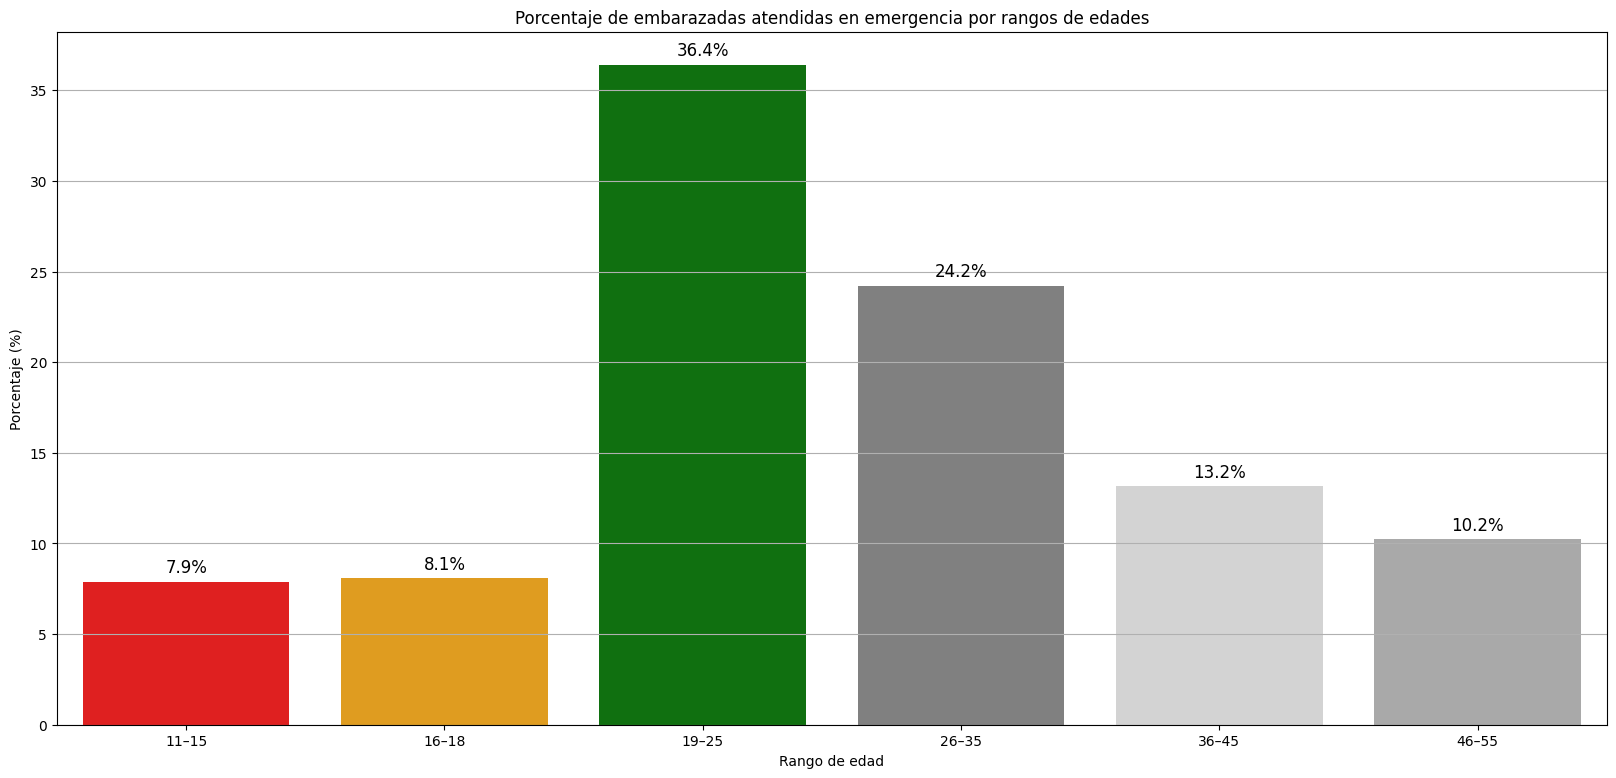

In [29]:
embarazos = df_copia[df_copia['EVOLUCION'] == 'EMBARAZOS']

rangos = pd.cut(
    df_copia['EDAD'],
    bins=[10, 15, 18, 25, 35, 45, 55],
    labels=['11–15', '16–18', '19–25', '26–35', '36–45', '46–55']
)

conteo_rangos = rangos.value_counts().sort_index()
porcentajes = (conteo_rangos / conteo_rangos.sum()) * 100

colores = {
    '11–15': 'red',
    '16–18': 'orange',
    '19–25': 'green',
    '26–35': 'gray',
    '36–45': 'lightgray',
    '46–55': 'darkgray'
}

plt.figure(figsize=(20,9))
sns.barplot(
    x=porcentajes.index,
    y=porcentajes.values,
    palette=[colores[r] for r in porcentajes.index]
)

plt.title('Porcentaje de embarazadas atendidas en emergencia por rangos de edades')
plt.xlabel('Rango de edad')
plt.ylabel('Porcentaje (%)')
plt.grid(axis='y')

for i, valor in enumerate(porcentajes.values):
    plt.text(i, valor + 0.5, f"{valor:.1f}%", ha='center', fontsize=12)

plt.show()


* Explicacion de grafica

La gráfica correspondiente al periodo 2021–2025 muestra que el mayor porcentaje de embarazos atendidos en emergencia se concentra en mujeres de 19 a 25 años (36.4%), seguido por el grupo de 26 a 35 años (24.2%), coherente con las edades reproductivas más habituales; sin embargo, el hallazgo más crítico aparece en las menores de edad: al sumar los embarazos de preadolescentes de 11–15 años (7.9%) con los de adolescentes de 16–18 años (8.1%), se obtiene un 16% de embarazos antes de los 18 años, una cifra grave que evidencia deficiencias en educación sexual, limitado acceso a métodos anticonceptivos y problemas serios de protección de menores. En particular, el grupo de 11–15 años representa una situación alarmante, ya que estos embarazos suelen estar vinculados a vulneraciones de derechos, ausencia de acompañamiento y alto riesgo biológico, lo que demanda intervenciones urgentes, integrales y sostenidas para reducir esta problemática en los próximos años.La gráfica muestra la distribución de mujeres embarazadas que llegaron al área de emergencia entre 2021 y 2025, organizadas por rangos de edad. Se observa que la mayor cantidad de casos corresponde a mujeres entre 19 y 25 años, que es el rango más común y esperado de embarazos, acumulando alrededor de 60 mil atenciones durante todo el período. Sin embargo, el dato más preocupante es la presencia de cerca de 15 mil embarazos en preadolescentes entre 11 y 15 años, una cifra alarmante que evidencia serios retos en cuanto a educación sexual, acceso a métodos anticonceptivos y protección de menores. Esta situación resalta la necesidad de reforzar las medidas preventivas y desarrollar políticas más efectivas para reducir estos casos, de manera que para el 2026 se logren avances reales a través de programas educativos, apoyo familiar, campañas comunitarias y un mayor acceso a servicios de salud sexual y reproductiva.


# ANALISIS DESCRIPTIVO 📉📊

Nuestro analisis descriptivo tratara de la variable de especialidad que nos indicaria la mayoria de solicitudes de los pacientes al llegar emergercia que especialidad que trata mas los pacientes con la llegada a partir de las fechas 2021 - 2025.

* UTILIZAREMOS LA LIBRERIA YDATA PROFILINF EXCELENTE PARA UNA GRAN EXPLICACION DE UN DATA Y ANALISIS DESCRIPTIVO

In [30]:
profile = ProfileReport(df_copia, title="REPORTE DE EMERGENCIAS 2021 - 2025", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:02<00:00,  3.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Analisis descriptivo con la libreria

Con esta librería podemos dar pasos gigantes en nuestro análisis descriptivo. Nos muestra el valor máximo, el mínimo, si existen valores nulos, y permite la creación de tablas estadísticas. También identifica duplicados, valores atípicos en nuestras variables y las correlaciones entre ellas (en este caso no hay, pero con otros datos sí podrían aparecer). Además, podemos filtrar por variables o columnas, y también genera gráficos de los valores más altos o que más destacan dentro de nuestros datos. En resumen, es una excelente librería para el análisis descriptivo.

---

In [31]:
#print(df_copia['ESPECIALIDAD'].unique())
especialidad = df_copia['ESPECIALIDAD'].value_counts()
print(especialidad)

ESPECIALIDAD
PEDIATRIA            74194
MEDICINA INTERNA     46388
GINECOLOGIA          39734
CIRUGIA GENERAL      38883
TRIAJE               35444
911                   9375
TRAUMATOLOGIA         3915
SIN_REGISTRO          1136
TRIAJE PEDIATRICO     1110
Name: count, dtype: int64


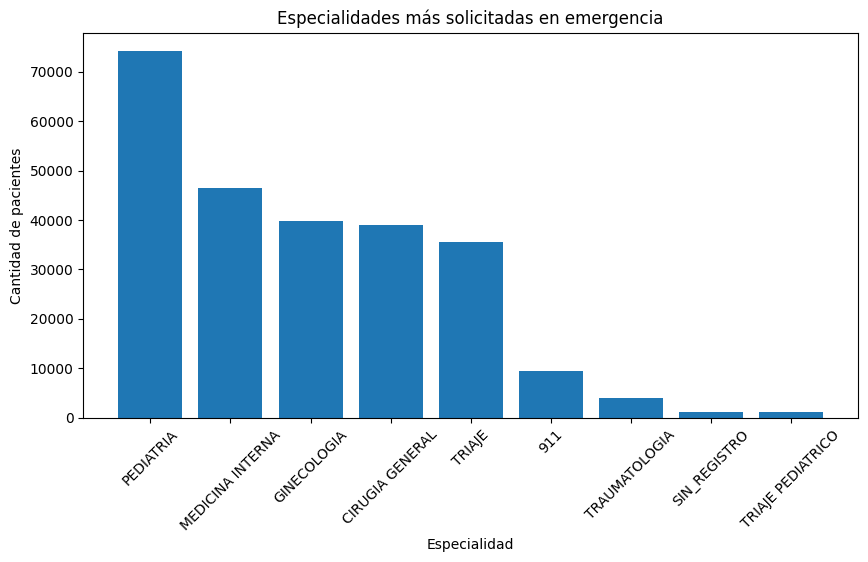

In [32]:
plt.figure(figsize=(10,5))
plt.bar(especialidad.index, especialidad.values)
plt.title('Especialidades más solicitadas en emergencia')
plt.xlabel('Especialidad')
plt.ylabel('Cantidad de pacientes')
plt.xticks(rotation=45)
plt.show()

* Analisi descriptivo

En nuestro análisis descriptivo nos damos cuenta de que una de las especialidades más concurridas después de la llegada de los pacientes a emergencia es Pediatría, con un registro de más de 70,000 atenciones entre 2021 y 2025. Esto nos indica la necesidad de contar con más médicos pediatras para mejorar la capacidad de respuesta y el rendimiento del servicio en el futuro.

# ANALISIS PREDICTIVO

* Explicacion para nuestro analisis predictivo

Nuestro modelo predictivo será un modelo **SARIMA**, aplicado a las proyecciones futuras de la cantidad de pacientes que requerirán la especialidad de **pediatría** para el año **2026**. Este modelo nos permitirá obtener proyecciones mensuales y analizar el comportamiento esperado de la demanda a futuro.


In [33]:
df_pediatria = df_copia[df_copia['ESPECIALIDAD'] == 'PEDIATRIA'].copy()
conteo_mensual = df_pediatria.groupby(pd.Grouper(key= 'FECHA', freq= 'MS')).size().reset_index(name= 'PACIENTES')

In [34]:
df_log = np.log(conteo_mensual['PACIENTES'])
conteo_mensual['PACIENTES_LOG'] = np.log(conteo_mensual['PACIENTES'])

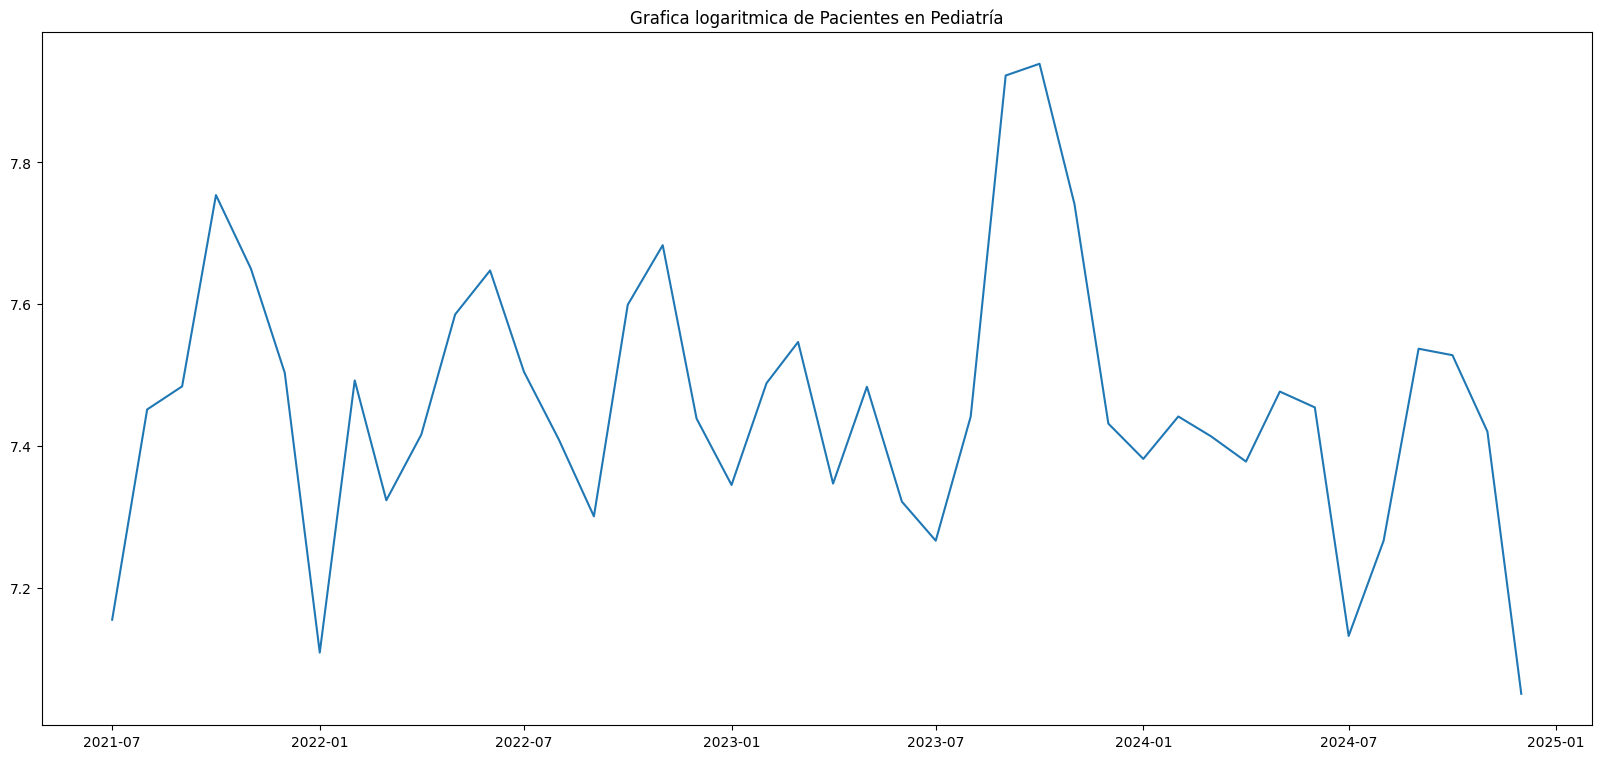

In [35]:
plt.figure(figsize=(20,9))
plt.title('Grafica logaritmica de Pacientes en Pediatría')
plt.plot(conteo_mensual['FECHA'], conteo_mensual['PACIENTES_LOG'])
plt.show()

* Explicacion de nuestra primera grafica logaritmica 

En esta gráfica podemos observar que nuestros datos no son estacionarios, ya que presentan variaciones en la tendencia y la variabilidad a lo largo del tiempo. Debido a esto, aplicaremos la prueba de Dickey-Fuller (ADF test) para evaluar formalmente el nivel de estacionariedad de la serie. Posteriormente, realizaremos las transformaciones necesarias —como diferenciación o ajustes adicionales— con el objetivo de mejorar la estacionariedad y así obtener un modelo más sólido y confiable para nuestras proyecciones futuras.

In [36]:
df_log_diff = conteo_mensual['PACIENTES_LOG'].diff().dropna()
resultado_adf = adfuller(df_log_diff)
print('ADF Statistic:', resultado_adf[0])
print('p-value:', resultado_adf[1])

if resultado_adf[1] < 0.05:
    print("La serie es estacionaria (p-value < 0.05).")
else:
    print("La serie aún no es estacionaria.")

ADF Statistic: -6.259563068907715
p-value: 4.256076179742097e-08
La serie es estacionaria (p-value < 0.05).


* Explicacion de p-value

Vemos que, después de aplicar el proceso de estacionarización, el p-value obtenido es menor a 0.05, lo que indica que podemos rechazar la hipótesis nula de no estacionariedad. Por lo tanto, la serie se considera estacionaria, lo cual es adecuado para continuar con la construcción del modelo predictivo.

In [37]:
df_estacionaria = df_log_diff.diff(periods=12).dropna()
resultado_adf_final = adfuller(df_estacionaria)

print('p-value final:', resultado_adf_final[1])

p-value final: 6.396158488728844e-05


* GRAFICO ANTES Y DESPUES

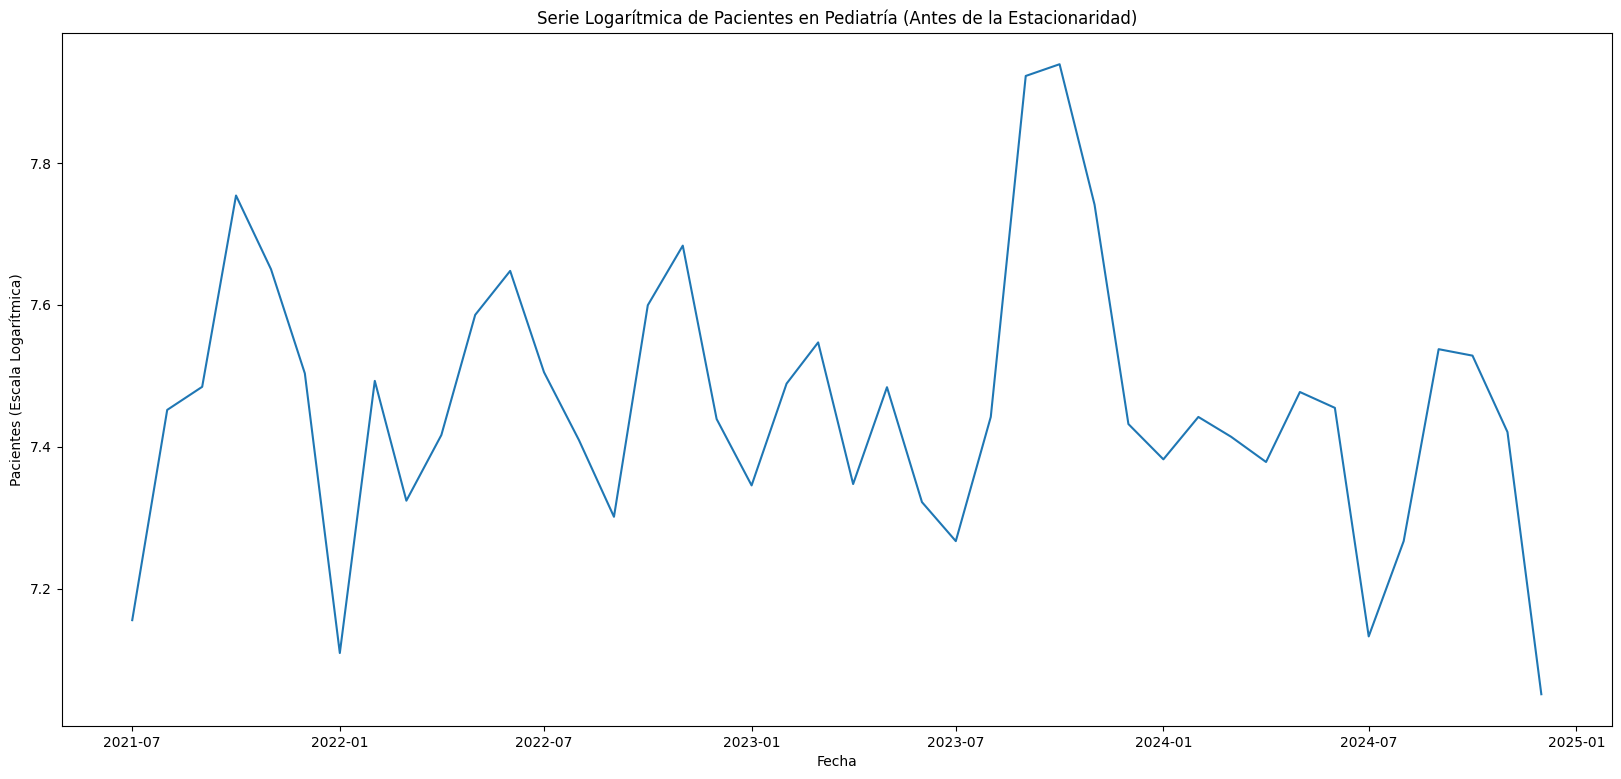

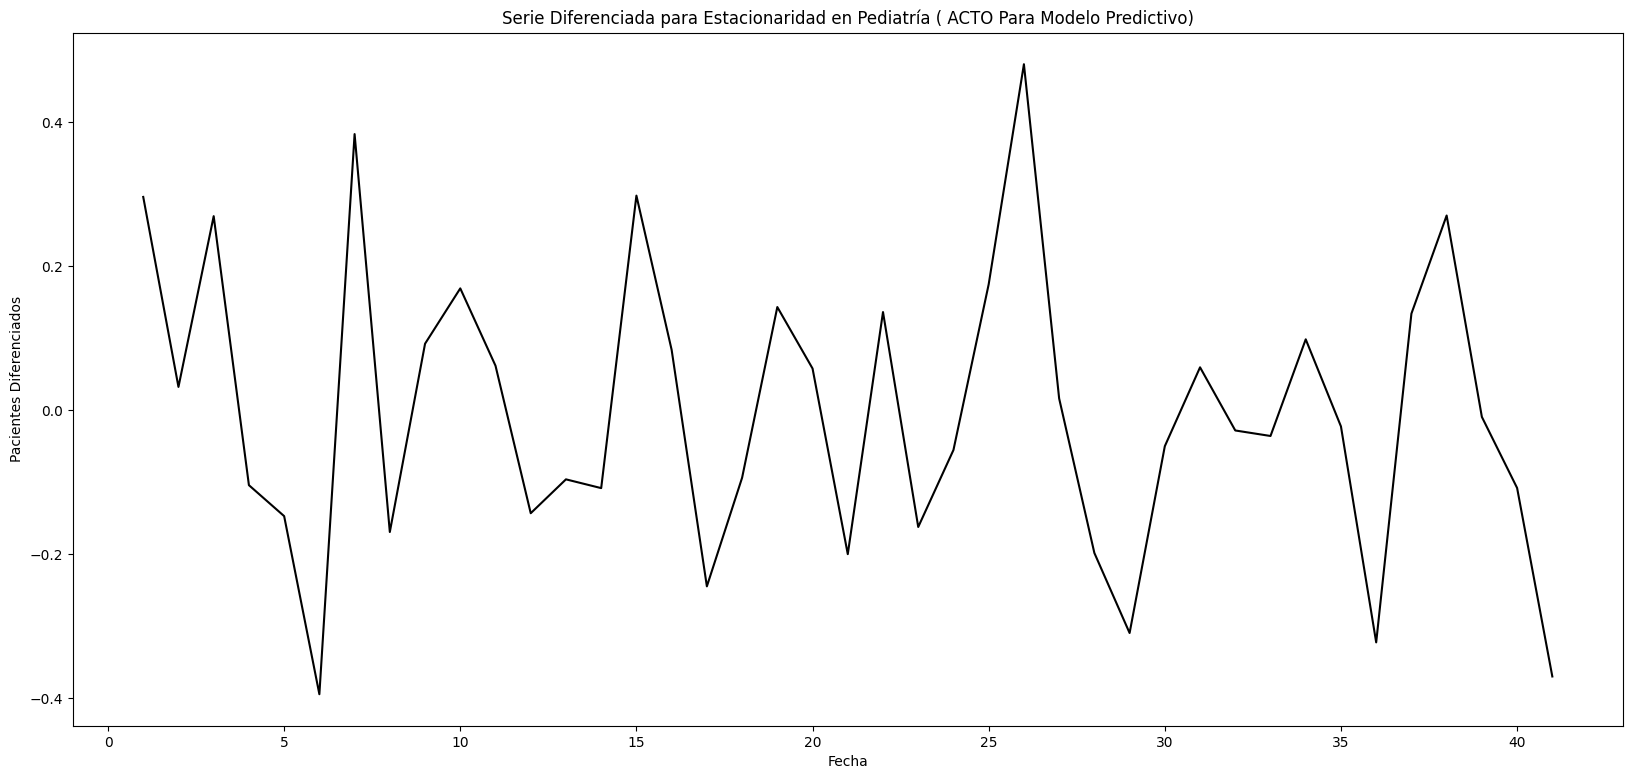

In [38]:
# Antes de la estacionaridad

plt.figure(figsize=(20,9))
plt.title('Serie Logarítmica de Pacientes en Pediatría (Antes de la Estacionaridad)')
plt.plot(conteo_mensual['FECHA'], conteo_mensual['PACIENTES_LOG'])
plt.xlabel('Fecha')
plt.ylabel('Pacientes (Escala Logarítmica)')
plt.show()


# Luego de la estacionaridad

plt.figure(figsize=(20,9))
plt.title('Serie Diferenciada para Estacionaridad en Pediatría ( ACTO Para Modelo Predictivo)')
plt.plot(df_log_diff, color='black')
plt.xlabel('Fecha')
plt.ylabel('Pacientes Diferenciados')
plt.show()

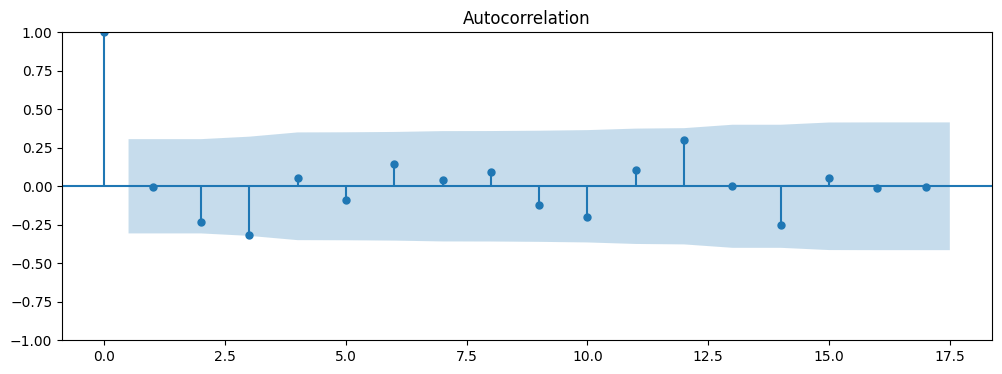

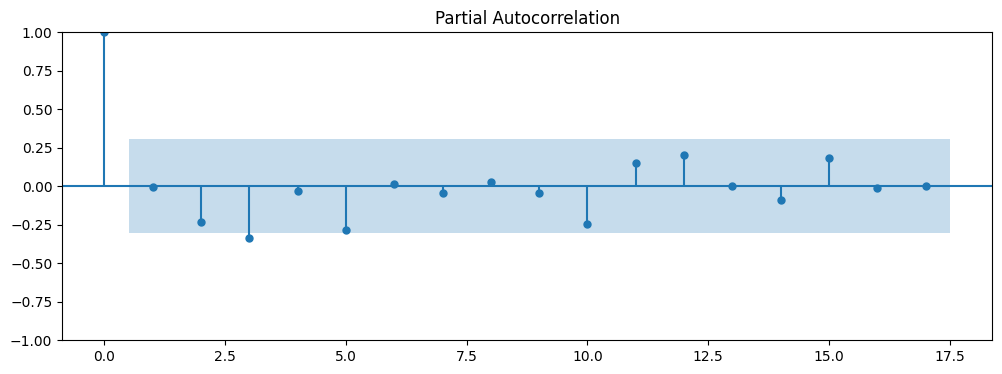

In [41]:
# Grafica para identificar p y q para nuestro modelo ARIMA
plt.figure(figsize=(12,4))
plot_acf(df_log_diff, ax=plt.gca())
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(df_log_diff, ax=plt.gca())
plt.show()

In [ ]:
# Esta librria pmdariama donde nos ayuda a encontrar los terminos reconmendado que mejor se adapte a nuestro modelos predictivos
from pmdarima import auto_arima

In [ ]:
# Buscando nuestro mejor terminos
auto_arima(
    conteo_mensual['PACIENTES_LOG'],
    start_p=1,
    start_q=1,
    start_P=1,
    start_Q=1,
    seasonal=True,
    m=12,
    test='adf',
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-11.568, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-13.523, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-11.644, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-13.562, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-15.384, Time=0.05 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-14.927, Time=0.15 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-14.999, Time=0.13 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-13.614, Time=0.04 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-13.010, Time=0.37 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-13.580, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=-17.381, Time=0.04 sec
 ARIMA(0,1,0)(2,0,0)[12]             : AIC=-16.922, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AI

,order,"(0, ...)"
,seasonal_order,"(1, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [52]:
# De esta manera se la cantidad de meses que encuentra registrado para la division
len(conteo_mensual['PACIENTES_LOG'])

42

In [ ]:
# division de los datos del modelo
train = conteo_mensual['PACIENTES_LOG'].iloc[:34]
test = conteo_mensual['PACIENTES_LOG'].iloc[34:]

train.shape, test.shape

((34,), (8,))

In [ ]:
# Mostrando nuestro modelo
modelo = SARIMAX(train, order=(0,1,0), seasonal_order = (1,0,0,12))
resultado = modelo.fit()
print(resultado.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      PACIENTES_LOG   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                   7.237
Date:                            Tue, 25 Nov 2025   AIC                            -10.475
Time:                                    18:31:24   BIC                             -7.482
Sample:                                         0   HQIC                            -9.468
                                             - 34                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2419      0.270      0.895      0.371      -0.288       0.772
sigma2         0.0369      0.009   

* Explicacion de nuestro modelo SARIMA

Aquí vemos que nuestro modelo está funcionando correctamente porque el AIC está negativo y bajo, lo que indica que el modelo es simple y estable. También se observa que no hay evidencia de que los residuos violen la normalidad, por lo que los términos (0,1,0) están bien. Aunque podría probar otro modelo para comparar, prefiero dejarlo así porque no creo que cambien mucho los resultados.

In [ ]:
# Cantiadad a pronosticar
steps = len(test)

forecast = resultado.get_forecast(steps=steps)

pred_mean = forecast.predicted_mean
pred_ci = forecast.conf_int()

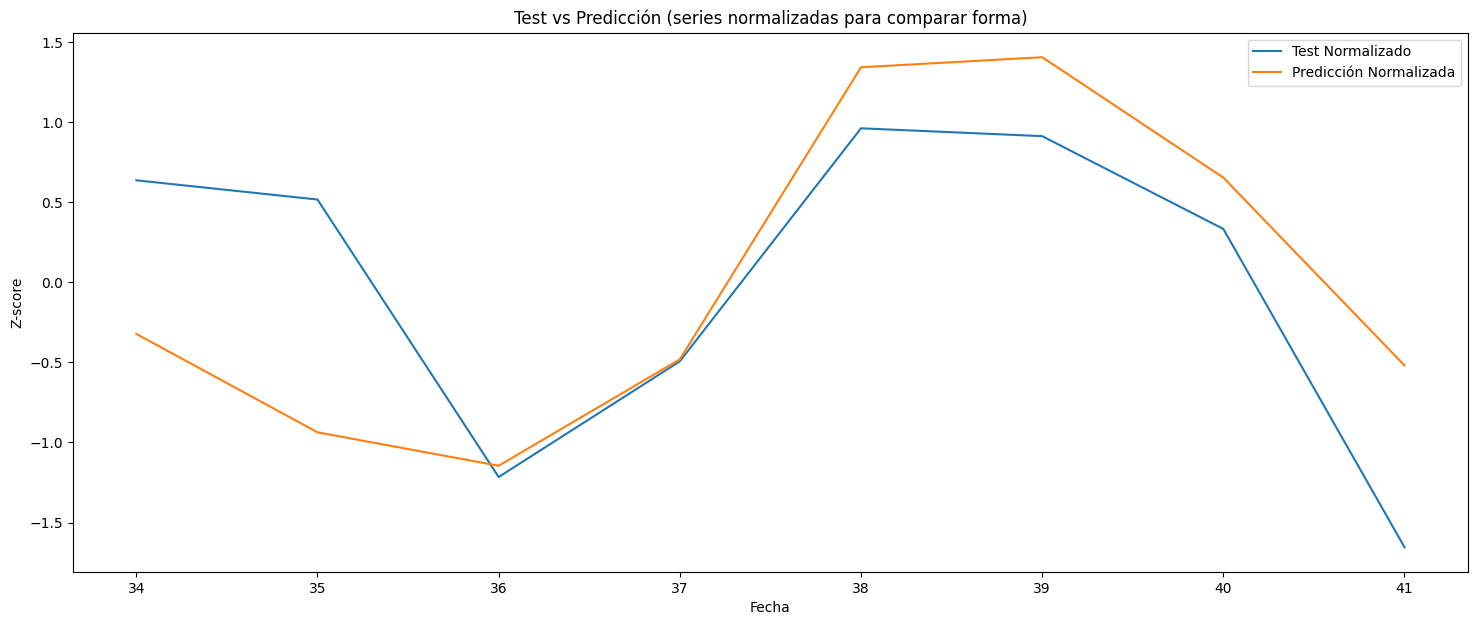

In [ ]:
test_norm = (test - test.mean()) / test.std()
pred_norm = (pred_mean - pred_mean.mean()) / pred_mean.std()

plt.figure(figsize=(18,7))
plt.title("Test vs Predicción (series normalizadas para comparar forma)")
plt.plot(test_norm.index, test_norm, label='Test Normalizado')
plt.plot(pred_norm.index, pred_norm, label='Predicción Normalizada')
plt.xlabel("Fecha")
plt.ylabel("Z-score")
plt.legend()
plt.show()

* AQUI OBSERVAMOS QUE NUESTRAS PREDICCIONES SE COMPORTA DE LA MANERA CORRECTA.

In [ ]:
# Graficamos con la libreria plotly para hacer lo mas dinamico y ver avance

df_plot = pd.DataFrame({
    'Fecha': conteo_mensual.index.tolist() + pred_mean.index.tolist() + pred_ci.index.tolist() + pred_ci.index.tolist(),
    'Valor': conteo_mensual['PACIENTES_LOG'].tolist() + pred_mean.tolist() + pred_ci.iloc[:,0].tolist() + pred_ci.iloc[:,1].tolist(),
    'Tipo': (['Real'] * len(conteo_mensual)) +
            (['Pronóstico'] * len(pred_mean)) +
            (['IC_Lower'] * len(pred_ci)) +
            (['IC_Upper'] * len(pred_ci))
})

fig = px.line(df_plot, x='Fecha', y='Valor', color='Tipo',
              title='Modelo SARIMAX – Proyección Futura con Intervalos de Confianza')

fig.show()

* Explicacion de nuestro modelo de futuro a pacientes de pediatria que llegan a emergencias 

Mi modelo predictivo, representado por la línea roja del pronóstico, me indica que para el año 2026 la cantidad de pacientes se mantendrá relativamente similar a los meses anteriores. Esto me deja claro que no sería necesario realizar cambios en la infraestructura ni agregar más doctores a la especialidad de Pediatría, ya que la demanda se mantiene estable.

# ANALISIS PRESCRIPTIVO

* Explicacion de que tratara nuestro analisis prescriptivo

Como ya explicamos el comportamiento futuro de nuestros datos, ahora debemos establecer las recomendaciones en nuestro análisis prescriptivo. En este sentido, también debemos definir qué acciones se pueden tomar para enfrentar las futuras llegadas de emergencias, especialmente en la especialidad de Pediatría, que fue la que más sobresalió durante los meses y años analizado. Nuestro analisis va tratar de reconmendar los dias mas picos asi tener una cantidad mas de doctores de pediatria para que ayuden con la cantidad de pacientes con los dias ya tomados de nuestros datos a futuro.

In [ ]:
df_copia['DIA_SEMANA'] = df_copia['FECHA'].dt.day_name()
df_pediatria = df_copia[df_copia['ESPECIALIDAD'] == 'PEDIATRIA']

In [ ]:
conteo_dias = df_pediatria['DIA_SEMANA'].value_counts().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

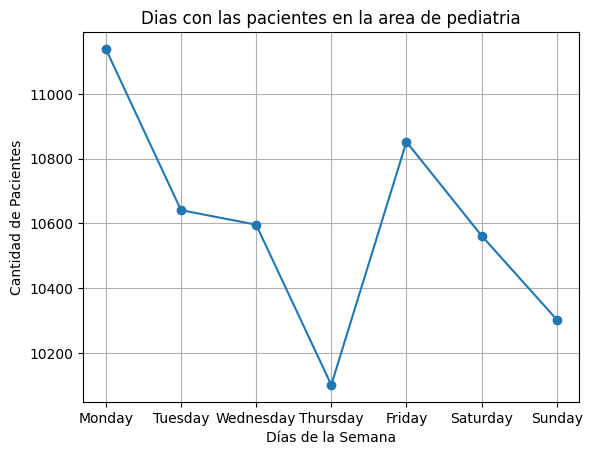

In [ ]:
# Graficando los dias que llegan mas emergencias a pediatria
plt.Figure(figsize=(30,9))
plt.title('Dias con las pacientes en la area de pediatria')
plt.plot(conteo_dias.index, conteo_dias.values, marker= 'o')
plt.xlabel('Días de la Semana')
plt.ylabel('Cantidad de Pacientes')
plt.grid(True)
plt.show()

In [ ]:
print('**DIAS CON MAS CANTIDADES DE PACIENTES EN EMERGENCIAS PARA EL AREA DE PEDIATRIA**')
print()
print(conteo_dias)

**DIAS CON MAS CANTIDADES DE PACIENTES EN EMERGENCIAS PARA EL AREA DE PEDIATRIA**

DIA_SEMANA
Monday       11139
Tuesday      10641
Wednesday    10596
Thursday     10101
Friday       10852
Saturday     10562
Sunday       10303
Name: count, dtype: int64


* INTERPRETACION DE LA GRAFICA

Basado en el análisis de demanda por día de la semana y la estabilidad pronosticada para 2026, se recomienda implementar un esquema de rotación de turnos reducido los fines de semana. La diferencia de demanda entre el lunes (día pico: 11.150 pacientes) y el domingo (día bajo: 10.300 pacientes) es de 850 pacientes. Esa reducción representa aproximadamente un 7,62% de la demanda del lunes, lo que equivale a cerca de 2 de 30 doctores (≈6,7%). Por tanto, se sugiere una disminución moderada de la dotación operativa (reducción de ~2 doctores) los sábados y domingos. El personal en descanso debe rotar semanalmente, garantizando que el equipo completo y descansado (30 doctores) esté disponible al inicio del lunes, el día de mayor riesgo de sobrecarga.

* Importar datos a archivo excel para trabajar en R pero la data limpia

In [49]:
df_copia.to_excel('Datos_limpios_emergencia.xlsx', index= False)